## Sorting Amazon Kindle Reviews + Ratings

In [1]:
# Import necessary libraries

import json
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load JSON data from the Kaggle dataset

data = []
with open('kindle_reviews.json') as json_file:
    for idx, line in enumerate(json_file):
        data.append(json.loads(line))
    
print(len(data))

982619


In [4]:
import os

print(os.getcwd())

/Users/hayleengn/Desktop/emse6586


In [5]:
# Set up and connect to the SQLite database

conn = sqlite3.connect('kindlereviews.db')
cursor = conn.cursor()

# Create a table to store JSON data

cursor.execute("""CREATE TABLE IF NOT EXISTS kindle (
    reviewerID  TEXT,
    asin TEXT,
    reviewerName  TEXT,
    helpful   TEXT,
    reviewText  TEXT,
    overall    REAL,
    summary    TEXT,
    unixReviewTime INTEGER,
    reviewTime TEXT)"""
);

In [6]:
# Insert the JSON data into the table

for item in data:
    if "reviewerName" not in item:
        item["reviewerName"] = ""
    values = [str(value) for value in item.values()]
    values_tuple = tuple(values)
    
    cursor.execute("INSERT INTO kindle (reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)", values_tuple) 

In [8]:
# Create a dataframe using query from our table from our database

query = "SELECT * FROM kindle"
cursor.execute(query)

df = pd.read_sql_query(query, conn)

In [9]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014"
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014"
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014"
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014"
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014"


In [10]:
# Get summary of the dataframe

summary = df.describe()
print(summary)

            reviewerID        asin     reviewerName helpful reviewText  \
count           982619      982619           982619  982619     982619   
unique           68223       61934            55551    5289     978479   
top     A13QTZ8CIMHHG4  B006GWO5WK  Amazon Customer  [0, 0]        5.0   
freq              1173        1113            53811  527700       2007   

         overall    summary  unixReviewTime reviewTime  
count   982619.0     982619          982619     982619  
unique    3128.0     622113            2965       2117  
top          5.0  Good read      1404691200             
freq    573258.0       3545            2723       3799  


In [11]:
# Get the number of reviews each rating has

query = """
select overall as ratings, count(overall) as count 
from kindle 
group by overall"""

ratings = pd.read_sql_query(query, conn)
ratings

,ratings,count
0,1.0,22814
1,2.0,33932
2,3.0,95730
3,4.0,253087
4,5.0,573258
...,...,...
3123,wow banger,1
3124,"wow, interesting take on an old story",1
3125,you get what you pay for,1
3126,you will love it anyway,1


In [12]:
# Remove rating data that is not numerical to count the number of (numerical) reviews for each rating

new_ratings = ratings[pd.to_numeric(ratings['ratings'], errors='coerce').notna()]
new_ratings = new_ratings.reset_index(drop=True)
new_ratings

,ratings,count
0,1.0,22814
1,2.0,33932
2,3.0,95730
3,4.0,253087
4,5.0,573258


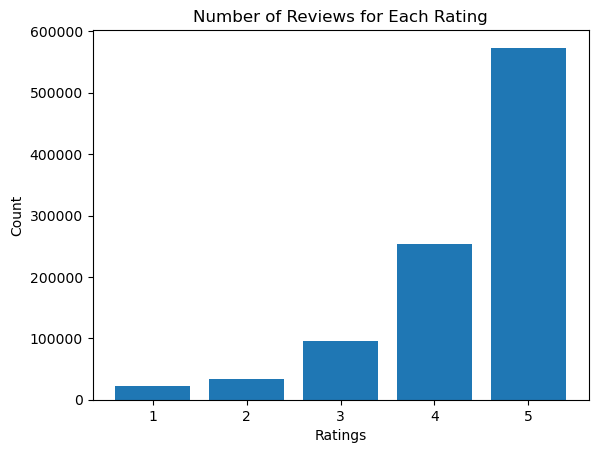

In [13]:
# Plot the reviews distribution of each rating

plt.bar(new_ratings['ratings'], new_ratings['count'])

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Number of Reviews for Each Rating')

plt.show()

In [14]:
df2 = df[pd.to_numeric(df['overall'], errors='coerce').notna()]
df2

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014"
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014"
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014"
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014"
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014"
...,...,...,...,...,...,...,...,...,...
982614,A2Y66HD4J5S7QZ,B00M13FNSS,Candi,"[2, 2]",Yasss hunny! This is a great read. That Dre is...,5.0,A Hot Read Indeed!!,1406073600,"07 23, 2014"
982615,A17YHECC8H9NEY,B00M13FNSS,Margie,"[0, 0]",I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,5.0,VERY GOOD BOOK,1406073600,"07 23, 2014"
982616,A20KO0BPMNREJL,B00M13FNSS,Nicki,"[1, 1]",Great book! Cherika was a fool. She let that m...,5.0,Great Read,1406073600,"07 23, 2014"
982617,A1BQO66R6OLCCW,B00M13FNSS,Nikey,"[0, 0]",When I say this was an excellent book please b...,5.0,Wow!!,1406073600,"07 23, 2014"


In [15]:
# Get a statistical summary of the overall ratings

df2['overall'] = df2['overall'].apply(pd.to_numeric)
df2['overall'].describe()

/var/folders/js/3zc_8t9j7sq6833_hnnh912r0000gn/T/ipykernel_21431/507044293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['overall'] = df2['overall'].apply(pd.to_numeric)


count    978821.000000
mean          4.348605
std           0.954134
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

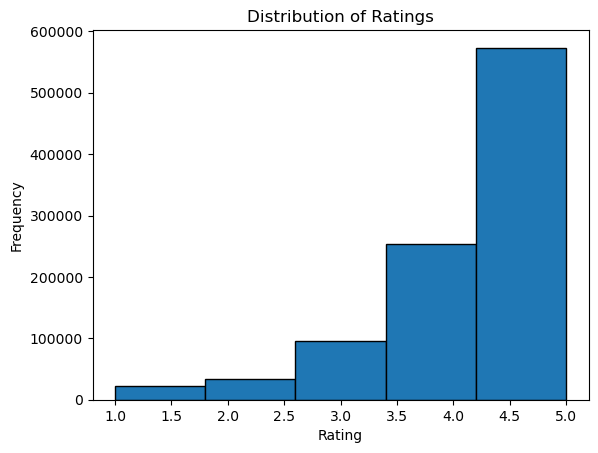

In [44]:
# Plot the distribution of ratings by average

plt.hist(df2['overall'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [45]:
query = """
select asin, count(overall) as count, avg(overall) as mean_ratings
from kindle 
group by asin
order by mean_ratings desc"""

df_asin = pd.read_sql_query(query, conn)
df_asin

,asin,count,mean_ratings
0,B00AFH6O4O,31,11.838710
1,B0093MU7QS,307,7.677524
2,B006244Q44,5,7.600000
3,B007HAWNYW,18,5.166667
4,B00LZ9OBWI,7,5.000000
...,...,...,...
61929,B0086824IE,34,0.382353
61930,B0082UPBWC,22,0.181818
61931,B0061YAUG8,287,0.090592
61932,B00JDZIK3W,6,0.000000


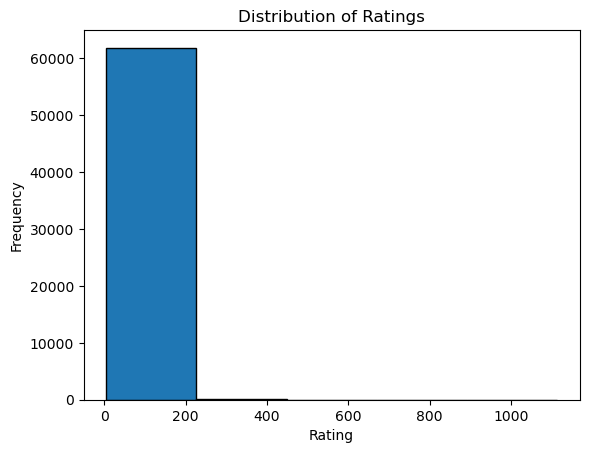

In [46]:
plt.hist(df_asin['count'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

Text(0.5, 1.0, 'Distribution of Mean Ratings')

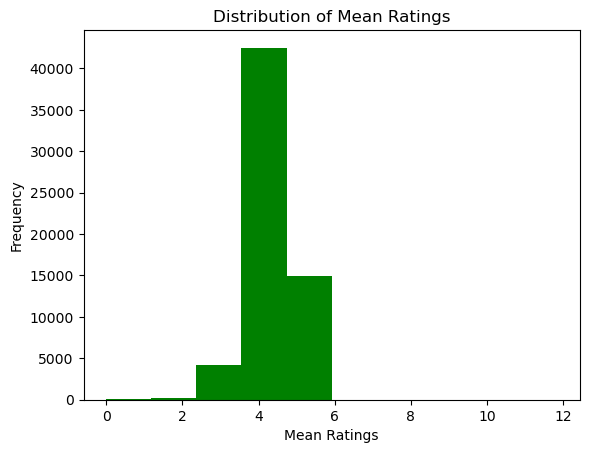

In [103]:
# Plot the distribution of mean ratings

plt.hist(df_asin['mean_ratings'], color='green')
plt.xlabel('Mean Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Ratings')

In [24]:
# Count the number of reviews for each product

query = """
select asin, count(asin) as number_of_reviews
from kindle 
group by asin
order by number_of_reviews desc"""

asin = pd.read_sql_query(query, conn)
asin

,asin,number_of_reviews
0,B006GWO5WK,1113
1,B00BTIDW4S,781
2,B00BT0J8ZS,516
3,B00JDYC5OI,502
4,B00H0V069M,481
...,...,...
61929,B000JMLG4S,5
61930,B000JML5JY,5
61931,B000JML2H4,5
61932,B000FA64QO,5


In [33]:
step = 100
max_value = 1200

review_ranges = list(range(0, max_value + step, step))
range_labels = [f"{start} - {end}" for start, end in zip(review_ranges[:-1], review_ranges[1:])]
range_labels[-1] = f"{review_ranges[-2]+1}+"

asin['review_range'] = pd.cut(asin['number_of_reviews'], bins=review_ranges, labels=range_labels)

# Print the grouped products
grouped = asin.groupby('review_range')['asin'].apply(list)
for range_, products in grouped.items():
    print(f"review_range: {range_}")
    print(f"asin: {products}\n")

review_range: 0 - 100
asin: ['B00IBHSZ4M', 'B00GXUXOG8', 'B00FKKWQXY', 'B00FJE9026', 'B00FCRLDWA', 'B00F6ELODW', 'B00F31FRKO', 'B00F007WI8', 'B00EZV2GZW', 'B00CO7GN1W', 'B00C2TCQUE', 'B00B8ZR41E', 'B00AY4OHHO', 'B008TQ0T8A', 'B006QQRH3A', 'B005PP3DVS', 'B00KDK0UBG', 'B00J9P60YC', 'B00J915BYG', 'B00H6DAPH2', 'B00E3KE91Y', 'B00DJK31TK', 'B00D1CPG5I', 'B00BHLGZJ6', 'B00B6LRUOG', 'B0097G7FUG', 'B007FIQMHU', 'B007CIMWZO', 'B0070ATV4E', 'B005IQZCB8', 'B002D48NBO', 'B00LKQNFVE', 'B00K2LJ5JY', 'B00GY9SK4O', 'B00FQQ1A8Y', 'B00EP6TCHC', 'B00DYUMCPY', 'B00DRN5X72', 'B00B3L1IN8', 'B00AR5HWXQ', 'B00AHE20W0', 'B009SGX2H0', 'B009QX0KSE', 'B008Y6B4S4', 'B0089HULLE', 'B0086829D4', 'B006C25GGI', 'B004E9U9AY', 'B00KV13TKG', 'B00K0OL35W', 'B00JUCHUMK', 'B00IVSJ298', 'B00II4IHQ4', 'B00HTJBE6O', 'B00HQLF9N4', 'B00H95FQRG', 'B00H91O5YA', 'B00GX5LIS4', 'B00F9EADLS', 'B00EOCROBI', 'B00EDCR48M', 'B00DK8L8Z0', 'B00CLRRAE4', 'B00BWY3UKU', 'B009DQ3LK8', 'B008VF567I', 'B008JI9EHU', 'B007WFQX9S', 'B003V8BU84', 'B00L

In [18]:
# Count the number of reviews for each product

query = """
select asin asin, count(asin) as count
from kindle 
group by asin
order by count desc"""

no_asin = pd.read_sql_query(query, conn)
no_asin

,asin,count
0,B006GWO5WK,1113
1,B00BTIDW4S,781
2,B00BT0J8ZS,516
3,B00JDYC5OI,502
4,B00H0V069M,481
...,...,...
61929,B000JMLG4S,5
61930,B000JML5JY,5
61931,B000JML2H4,5
61932,B000FA64QO,5


In [42]:
# Mean rating of all products

no_asin['count'].mean()

15.86558271708593

In [19]:
# Count the number of reviews from each reviewer ID

query = """
select reviewerID, count(reviewerID) as count
from kindle 
group by reviewerID
order by count desc"""

no_id = pd.read_sql_query(query, conn)
no_id

,reviewerID,count
0,A13QTZ8CIMHHG4,1173
1,A2WZJDFX12QXKD,1007
2,A320TMDV6KCFU,847
3,A3PTWPKPXOG8Y5,789
4,A1JLU5H1CCENWX,782
...,...,...
68218,A010971113OD625HDB6X8,5
68219,A0093003C4D9BVJ1YFA,5
68220,A0092581WFYQNV4KMUZ3,5
68221,A0090953K7LNUG6UPMI6,5


In [41]:
# Mean rating of all reviewer IDs

no_id['count'].mean()

14.40304589361359

In [39]:
df["helpful"].head()

0    [0, 0]
1    [2, 2]
2    [2, 2]
3    [1, 1]
4    [0, 1]
Name: helpful, dtype: object

## Sentiment Analysis

In [52]:
# Install the necessary library

!pip install nltk

In [89]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Get the review text column from the table
query = """
select reviewText
from kindle"""

cursor.execute(query)

# Get all rows from the query result
rows = cursor.fetchall()

In [90]:
# Iterate over the rows and perform sentiment analysis
sentiment_scores = []
for row in rows:
    text = row[0]  # Assuming the sentiment column is the first column
    sentiment_score = sia.polarity_scores(text)
    sentiment_scores.append(sentiment_score)

In [91]:
# Sentiment score for all review texts

for score in sentiment_scores:
    print(score)

In [93]:
df['Sentiment'] = df['reviewText'].apply(lambda x: sia.polarity_scores(x))
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Sentiment,Negative,Neutral,Positive
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014","{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.00,0.809,0.191
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014","{'neg': 0.05, 'neu': 0.775, 'pos': 0.175, 'com...",0.05,0.775,0.175
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014","{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.00,0.741,0.259
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014","{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.00,0.787,0.213


In [70]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Sentiment,Negative,Neutral,Positive
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014","{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.00,0.809,0.191
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014","{'neg': 0.05, 'neu': 0.775, 'pos': 0.175, 'com...",0.05,0.775,0.175
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014","{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.00,0.741,0.259
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014","{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.00,0.787,0.213


In [76]:
col = ['reviewerID', 'asin', 'reviewText', 'Negative', 'Neutral', 'Positive']
sentiment_score = df[col].copy()
sentiment_score

,reviewerID,asin,reviewText,Negative,Neutral,Positive
0,A1F6404F1VG29J,B000F83SZQ,I enjoy vintage books and movies so I enjoyed ...,0.000,0.809,0.191
1,AN0N05A9LIJEQ,B000F83SZQ,This book is a reissue of an old one; the auth...,0.050,0.775,0.175
2,A795DMNCJILA6,B000F83SZQ,This was a fairly interesting read. It had ol...,0.000,0.741,0.259
3,A1FV0SX13TWVXQ,B000F83SZQ,I'd never read any of the Amy Brewster mysteri...,0.000,1.000,0.000
4,A3SPTOKDG7WBLN,B000F83SZQ,"If you like period pieces - clothing, lingo, y...",0.000,0.787,0.213
...,...,...,...,...,...,...
982614,A2Y66HD4J5S7QZ,B00M13FNSS,Yasss hunny! This is a great read. That Dre is...,0.038,0.833,0.129
982615,A17YHECC8H9NEY,B00M13FNSS,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,0.198,0.703,0.099
982616,A20KO0BPMNREJL,B00M13FNSS,Great book! Cherika was a fool. She let that m...,0.143,0.760,0.097
982617,A1BQO66R6OLCCW,B00M13FNSS,When I say this was an excellent book please b...,0.000,0.780,0.220


In [79]:
cols = ['Negative', 'Neutral', 'Positive']
scores = df[cols].copy()
scores.head()

,Negative,Neutral,Positive
0,0.00,0.809,0.191
1,0.05,0.775,0.175
2,0.00,0.741,0.259
3,0.00,1.000,0.000
4,0.00,0.787,0.213


Text(0.5, 1.0, 'Distribution of Sentiment Scores')

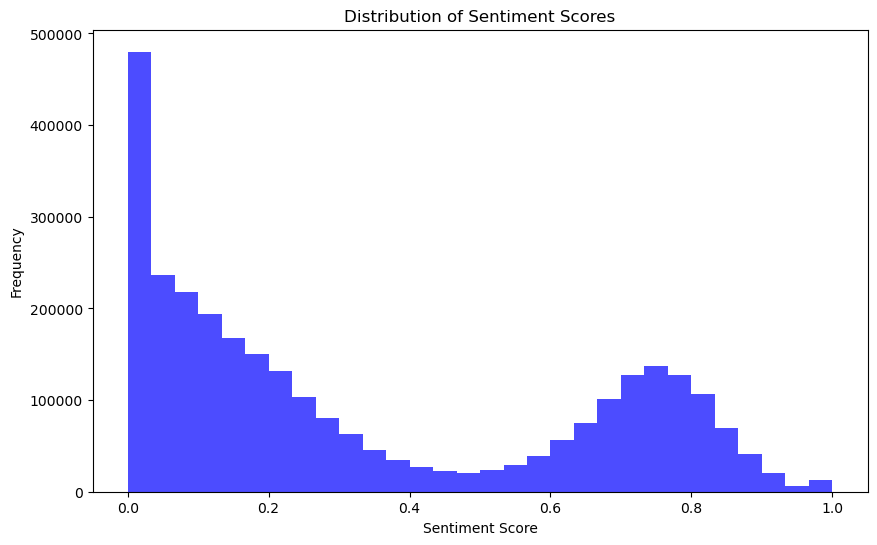

In [95]:
ss = sentiment_score[['Negative', 'Neutral', 'Positive']]

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot histogram of sentiment scores

plt.hist(ss.values.flatten(), bins=30, alpha=0.7, color='blue')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')

Text(0.5, 1.0, 'Distribution of Negative Scores')

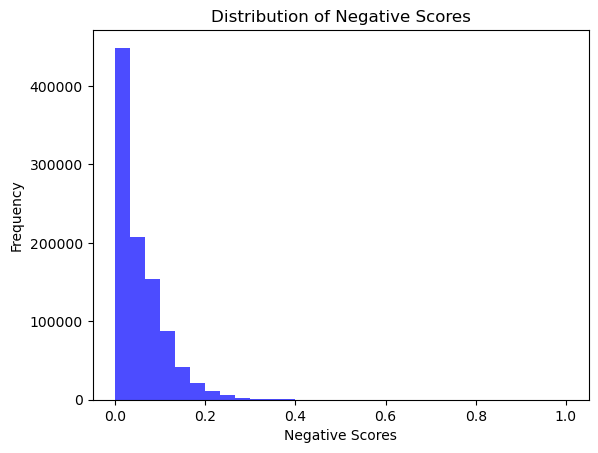

In [96]:
# Plot the distribution of negative sentiment scores

plt.hist(scores['Negative'], bins=30, alpha=0.7, color='blue')
plt.xlabel('Negative Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Negative Scores')

Text(0.5, 1.0, 'Distribution of Positive Scores')

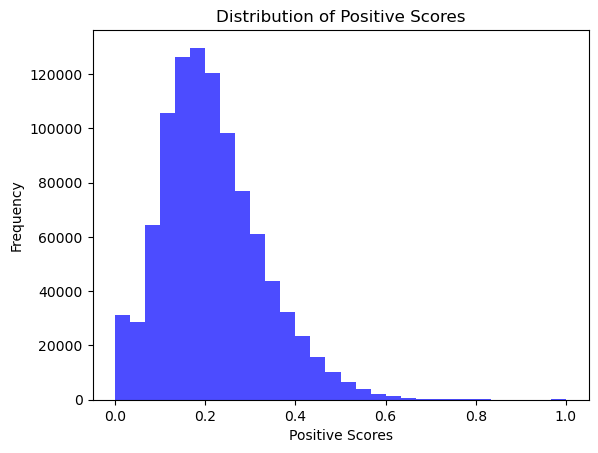

In [97]:
# Plot the distribution of positive sentiment scores

plt.hist(scores['Positive'], bins=30, alpha=0.7, color='blue')
plt.xlabel('Positive Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Scores')

Text(0.5, 1.0, 'Distribution of Neutral Scores')

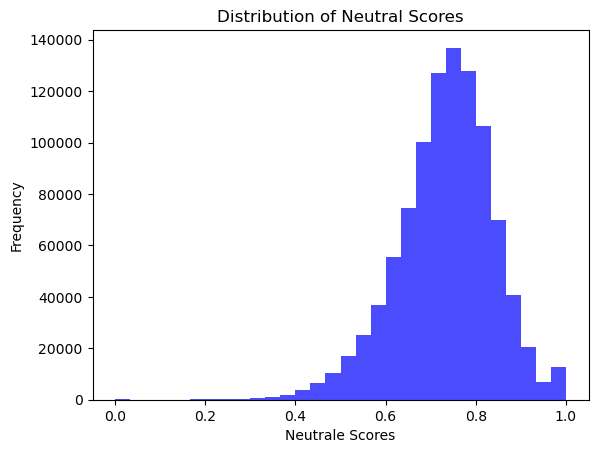

In [98]:
# Plot the distribution of neutral sentiment scores

plt.hist(scores['Neutral'], bins=30, alpha=0.7, color='blue')
plt.xlabel('Neutrale Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Neutral Scores')

In [81]:
# Assign sentiment labels for the reviews based on which score is the highest

sentiment_score['sentiment'] = sentiment_score[['Negative', 'Positive', 'Neutral']].idxmax(axis=1)
sentiment_score

,reviewerID,asin,reviewText,Negative,Neutral,Positive,sentiment
0,A1F6404F1VG29J,B000F83SZQ,I enjoy vintage books and movies so I enjoyed ...,0.000,0.809,0.191,Neutral
1,AN0N05A9LIJEQ,B000F83SZQ,This book is a reissue of an old one; the auth...,0.050,0.775,0.175,Neutral
2,A795DMNCJILA6,B000F83SZQ,This was a fairly interesting read. It had ol...,0.000,0.741,0.259,Neutral
3,A1FV0SX13TWVXQ,B000F83SZQ,I'd never read any of the Amy Brewster mysteri...,0.000,1.000,0.000,Neutral
4,A3SPTOKDG7WBLN,B000F83SZQ,"If you like period pieces - clothing, lingo, y...",0.000,0.787,0.213,Neutral
...,...,...,...,...,...,...,...
982614,A2Y66HD4J5S7QZ,B00M13FNSS,Yasss hunny! This is a great read. That Dre is...,0.038,0.833,0.129,Neutral
982615,A17YHECC8H9NEY,B00M13FNSS,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,0.198,0.703,0.099,Neutral
982616,A20KO0BPMNREJL,B00M13FNSS,Great book! Cherika was a fool. She let that m...,0.143,0.760,0.097,Neutral
982617,A1BQO66R6OLCCW,B00M13FNSS,When I say this was an excellent book please b...,0.000,0.780,0.220,Neutral


In [86]:
sents = sentiment_score.groupby('sentiment').count()
sents

,reviewerID,asin,reviewText,Negative,Neutral,Positive
sentiment,,,,,,
Negative,188,188,188,188,188,188
Neutral,964341,964341,964341,964341,964341,964341
Positive,18090,18090,18090,18090,18090,18090


Text(0.5, 1.0, 'Distribution of Sentiment in Reviews')

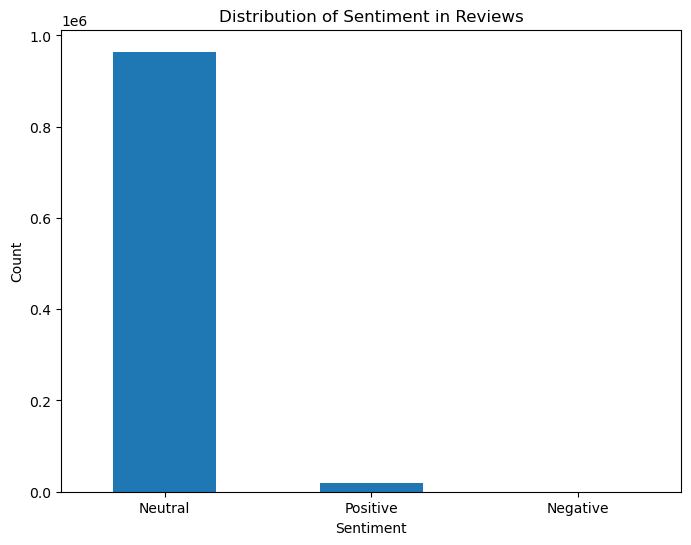

In [108]:
# Plot counts of each sentiment

counts = sentiment_score['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Distribution of Sentiment in Reviews')